In [1]:
%matplotlib inline
#%matplotlib widget
__author__           = "Anzal KS"
__copyright__        = "Copyright 2022-, Anzal KS"
__maintainer__       = "Anzal KS"
__email__            = "anzalks@ncbs.res.in"
from pathlib import Path
import neo.io as nio
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as spy
from pathlib import Path
#%matplotlib widget

In [20]:
f = '/Users/anzalks/Documents/Expt_data/Recordings/2023_01_20'
f=Path(f)
#f_plt = '/Users/anzalks/Documents/Expt_data/Recordings/CA1_recordings/x_spread_recording_02Hz_30mins/2022_12_12/data/2022_12_12_cell_3/aaaaa.png'
#file_name = f.split('/')[-1]

In [21]:
outdir = f/'plots'
outdir.mkdir(exist_ok=True, parents=True)

In [22]:
def list_files(p):
    f_list = []
    f_list=list(p.glob('**/*abf'))
    f_list.sort()
    return f_list

In [23]:
"""
extra functions
"""
"""
data filter function
"""
def filter_data(data, cutoff, filt_type, fs, order=3):
    '''
    creates and applies a filter
    '''
    b, a = spy.butter(order, cutoff, btype = filt_type, analog=False, output='ba', fs=fs)
    return spy.filtfilt(b, a, data)
    """
    b, a = spy.butter(order, cutoff, analog=False, output='ba', fs=fs)
    return spy.filtfilt(b, a, data)
    """

def downsampling_funct(d_array, initial_fs, final_fs):
    """
    down sampling function
    downsampling from 32 khz to 1khz
    initial_fs = initial smapling rate
    final_fs = final sampling rate
    1_d_array = 1 d rray with samples(ep_single channel data)
    """
    downsampling_factor = np.floor(initial_fs/final_fs)
    dat_idx = np.arange(0,len(d_array), downsampling_factor).astype(np.int32)
    ds_dat = d_array[dat_idx]
    return ds_dat

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = spy.butter(N=order, Wn=[low, high], btype='bandpass')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = spy.lfilter(b, a, data)
    return y



In [24]:
def protocol_file_name(file_name):
    f = str(file_name)
    reader = nio.AxonIO(f)
    protocol_name = reader._axon_info['sProtocolPath']
    protocol_name = str(protocol_name).split('\\')[-1]
    protocol_name = protocol_name.split('.')[-2]
    return protocol_name

In [25]:
def plot_optical(f,outdir):
    f_n = f.stem
    outdir = f'{outdir}/{f_n}'
    #prot_name = protocol_file_name(f)
    f = str(f)
    file_name = f.split('/')[-1]
    reader = nio.AxonIO(f)
    channels = reader.header['signal_channels']
    chan_count = len(channels)
    block  = reader.read_block(signal_group_mode='split-all')
    segments = block.segments
    sample_trace = segments[0].analogsignals[0]
    sampling_rate = sample_trace.sampling_rate
    ti = sample_trace.t_start
    tf = sample_trace.t_stop
    total_time = int(tf-ti)
    protocol_raw = reader.read_raw_protocol()
    protocol_raw = protocol_raw[0]
    print(total_time)
    unit = str(sample_trace.units).split()[1]
#        print(unit)
    fig, axs = plt.subplots(chan_count,2,figsize=(15,6),sharex='col')
    for i in range(chan_count):
        trace_average = []
        for s, segment in enumerate(segments):
            analogsignals = segment.analogsignals[i]
            unit = str(analogsignals.units).split()[1]
            trace = np.array(analogsignals)
            trace_average.append(trace)
            t = np.linspace(0,float(tf-ti),len(trace))
            axs[i][0].plot(t,trace,alpha=0.7,linewidth=2, label = f'trial - {s+1}')
        axs[0][0].set_title('recording')
        axs[0][0].set_ylabel(unit)
        axs[3][0].set_xlabel('time(s)')
        #axs[i][0].set_xlim(0.05,0.2)

    
    
        for n in protocol_raw:
            p = n[i]
            axs[i][1].plot(t,p)
        axs[0][1].set_title('protocol')
        

#axs[0][0].set_xlim(0.9,7.5) #7 pulses
#axs[0][0].set_xlim(2.105,2.12) #2nd pulse
#axs[0][0].set_xlim(4.105,4.12) #middle pulse
#axs[0][0].set_xlim(7.105,7.12) #last pulse

    fig.suptitle(file_name)
    plt.xlabel('time (s)',loc='center')
    plt.tight_layout()
    plt.savefig(f'{outdir}.png')
    plt.show()
    plt.close()
#fig.savefig(f_plt)

In [26]:
def plot_non_optical(f,outdir):
    f_n = f.stem
    outdir = f'{outdir}/{f_n}'
    #prot_name = protocol_file_name(f)
    f = str(f)
    file_name = f.split('/')[-1]
    reader = nio.AxonIO(f)
    channels = reader.header['signal_channels']
    chan_count = len(channels)
    block  = reader.read_block(signal_group_mode='split-all')
    segments = block.segments
    sample_trace = segments[0].analogsignals[0]
    sampling_rate = sample_trace.sampling_rate
    ti = sample_trace.t_start
    tf = sample_trace.t_stop
    total_time = int(tf-ti)
    protocol_raw = reader.read_raw_protocol()
    protocol_raw = protocol_raw[0]
    print(total_time)
    unit = str(sample_trace.units).split()[1]
#        print(unit)
    fig, axs = plt.subplots(chan_count,2,figsize=(15,6),sharex='col')
    for i in range(chan_count):
        trace_average = []
        for s, segment in enumerate(segments):
            analogsignals = segment.analogsignals[i]
            unit = str(analogsignals.units).split()[1]
            trace = np.array(analogsignals)
            trace_average.append(trace)
            t = np.linspace(0,float(tf-ti),len(trace))
            axs[i].plot(t,trace,alpha=0.7,linewidth=2, label = f'trial - {s+1}')
        axs[0].set_title('recording')
        axs[0].set_ylabel(unit) 
        for n in protocol_raw:
            p = n[i]
            axs[1].plot(t,p)
        axs[1].set_title('protocol')
        #axs[0].set_xlim(2,3)
        

#axs[0][0].set_xlim(0.9,7.5) #7 pulses
#axs[0][0].set_xlim(2.105,2.12) #2nd pulse
#axs[0][0].set_xlim(4.105,4.12) #middle pulse
#axs[0][0].set_xlim(7.105,7.12) #last pulse

    fig.suptitle(file_name)
    plt.xlabel('time (s)',loc='center')
    plt.tight_layout()
    plt.savefig(f'{outdir}.png')
    plt.show()
    plt.close()
#fig.savefig(f_plt)

In [27]:
abfs = list_files(f)

60
60


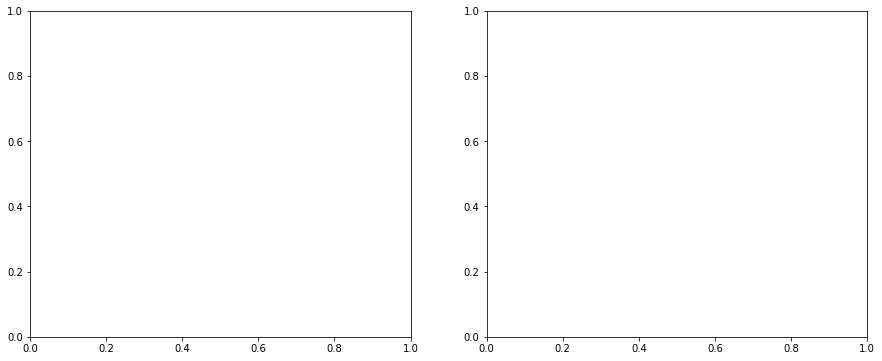

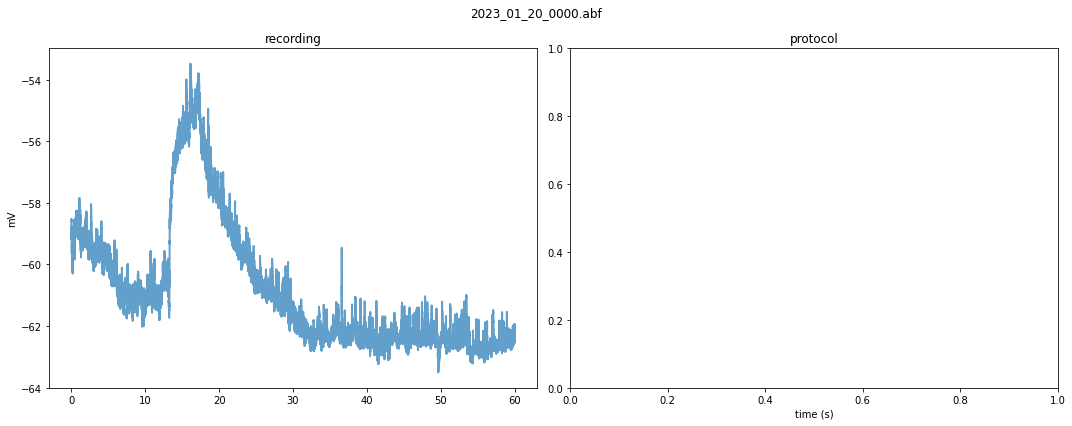

 non optical protocol : /Users/anzalks/Documents/Expt_data/Recordings/2023_01_20/2023_01_20_0000.abf
3
3


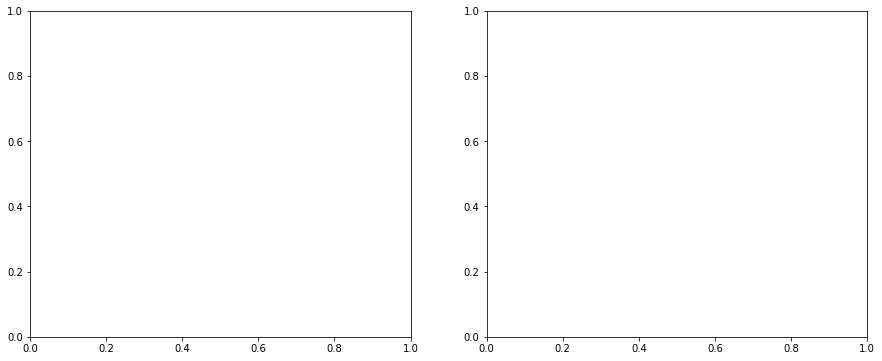

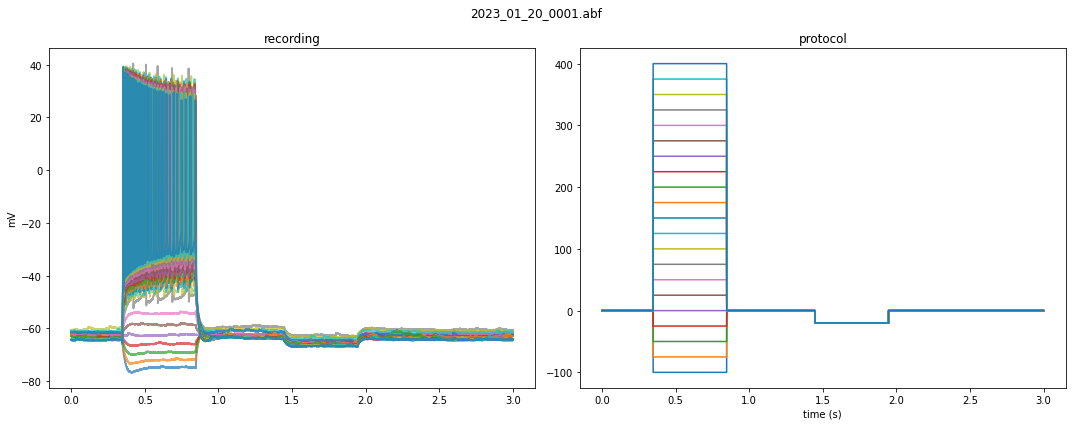

 non optical protocol : /Users/anzalks/Documents/Expt_data/Recordings/2023_01_20/2023_01_20_0001.abf
14
14


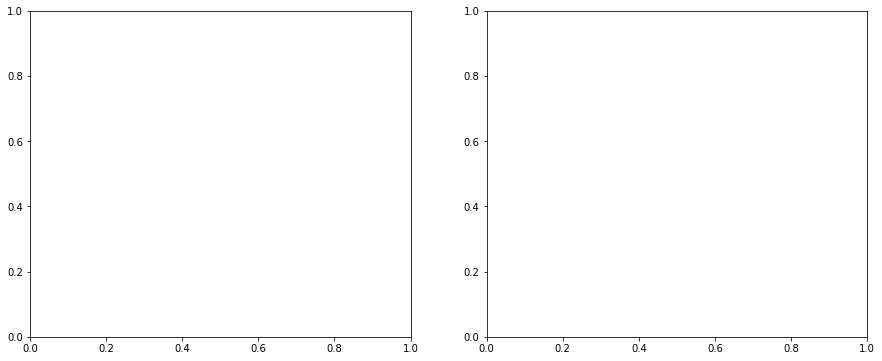

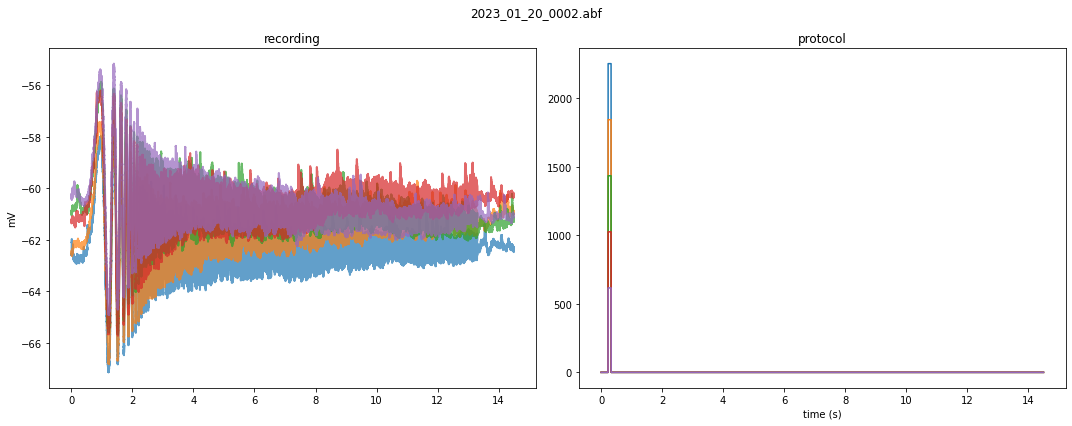

 non optical protocol : /Users/anzalks/Documents/Expt_data/Recordings/2023_01_20/2023_01_20_0002.abf
3
3


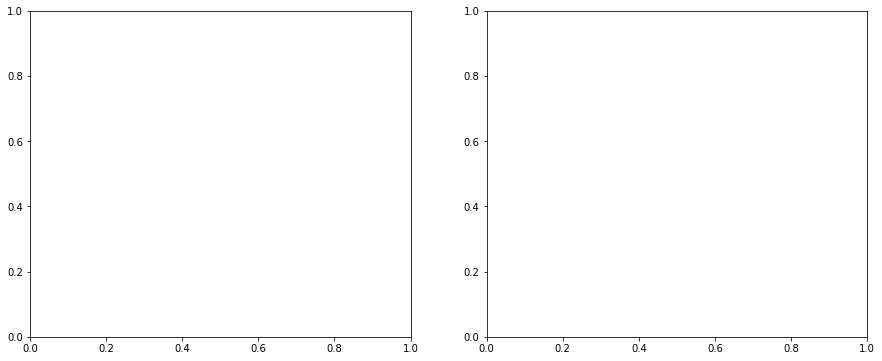

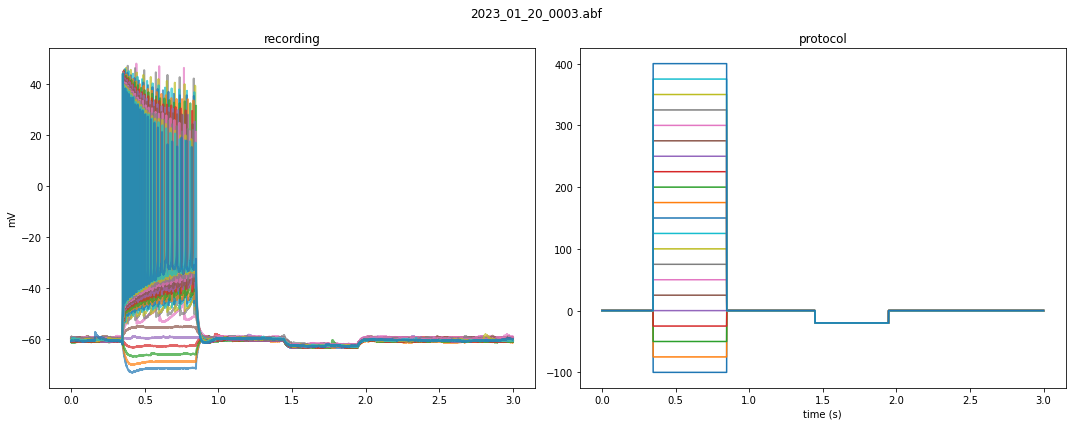

 non optical protocol : /Users/anzalks/Documents/Expt_data/Recordings/2023_01_20/2023_01_20_0003.abf
60
60


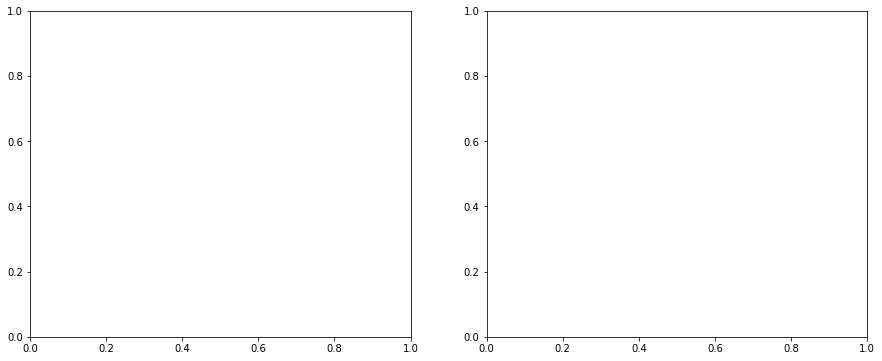

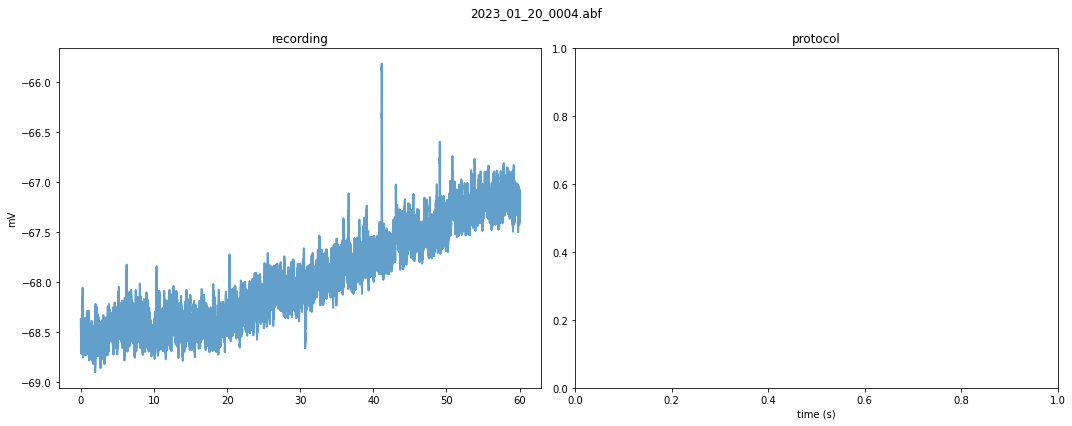

 non optical protocol : /Users/anzalks/Documents/Expt_data/Recordings/2023_01_20/2023_01_20_0004.abf
3
3


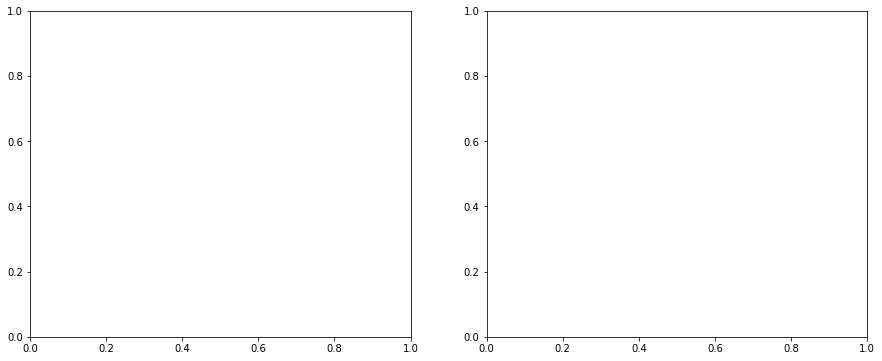

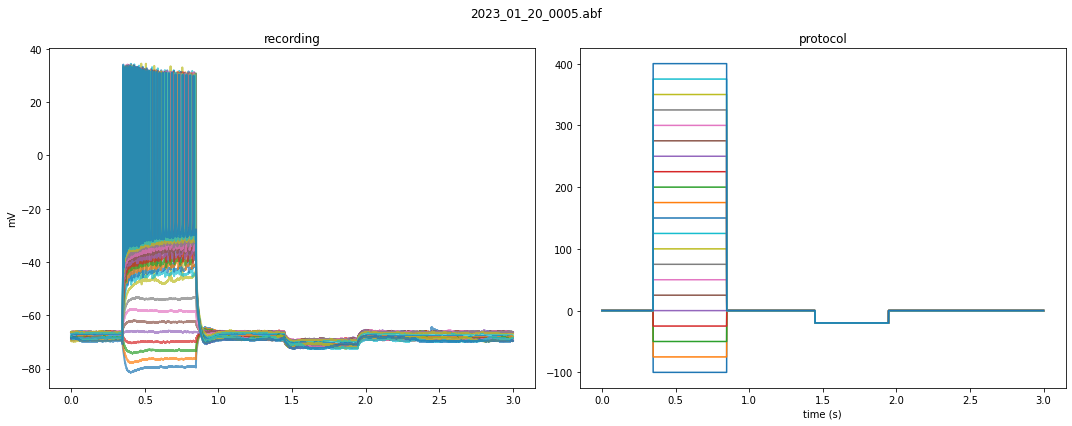

 non optical protocol : /Users/anzalks/Documents/Expt_data/Recordings/2023_01_20/2023_01_20_0005.abf
14
14


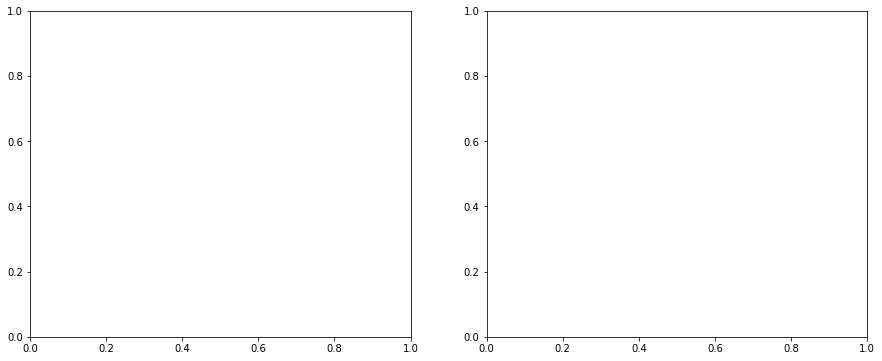

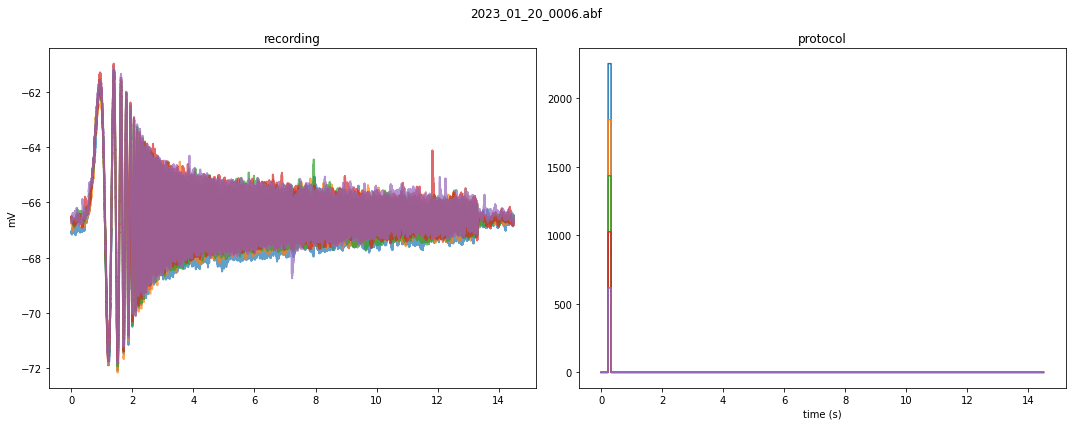

 non optical protocol : /Users/anzalks/Documents/Expt_data/Recordings/2023_01_20/2023_01_20_0006.abf
3
3


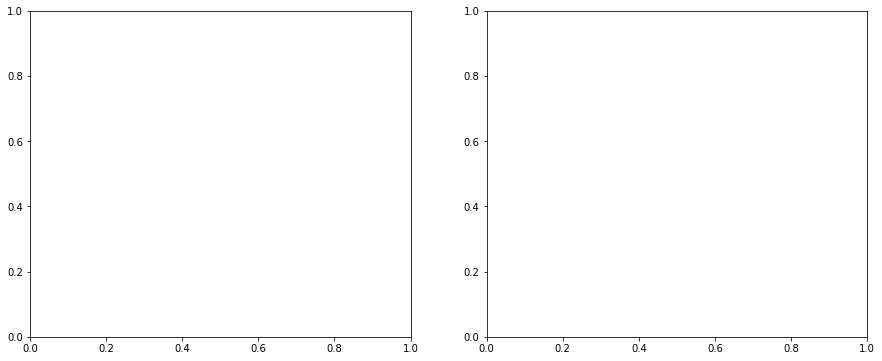

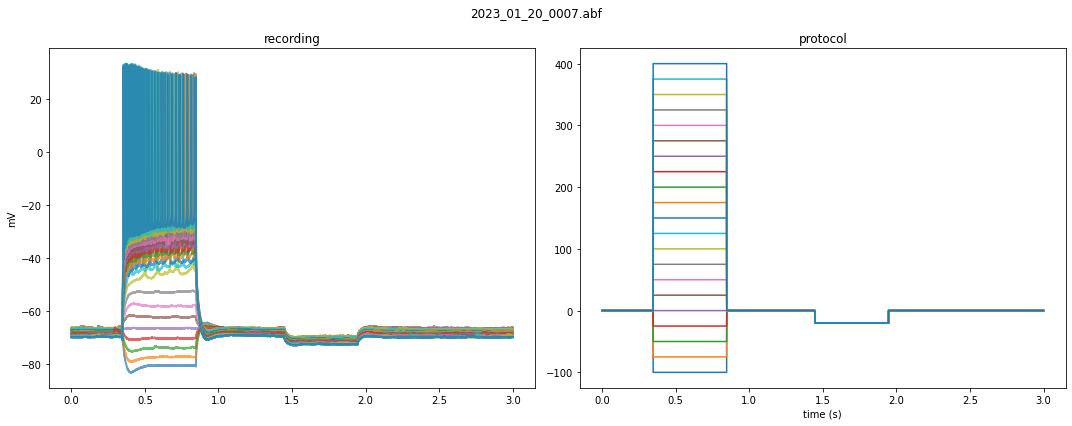

 non optical protocol : /Users/anzalks/Documents/Expt_data/Recordings/2023_01_20/2023_01_20_0007.abf
60
60


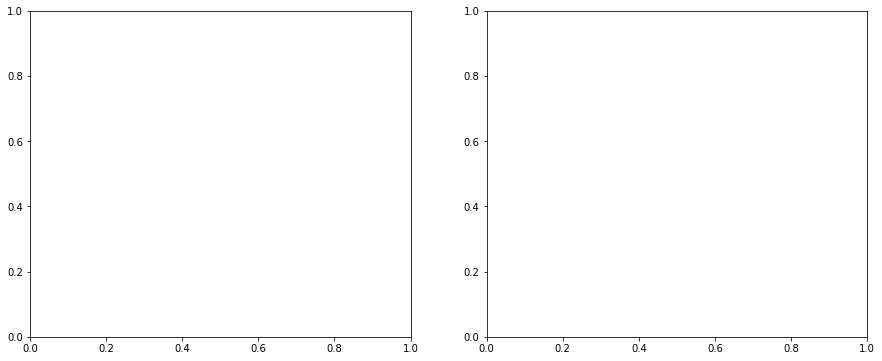

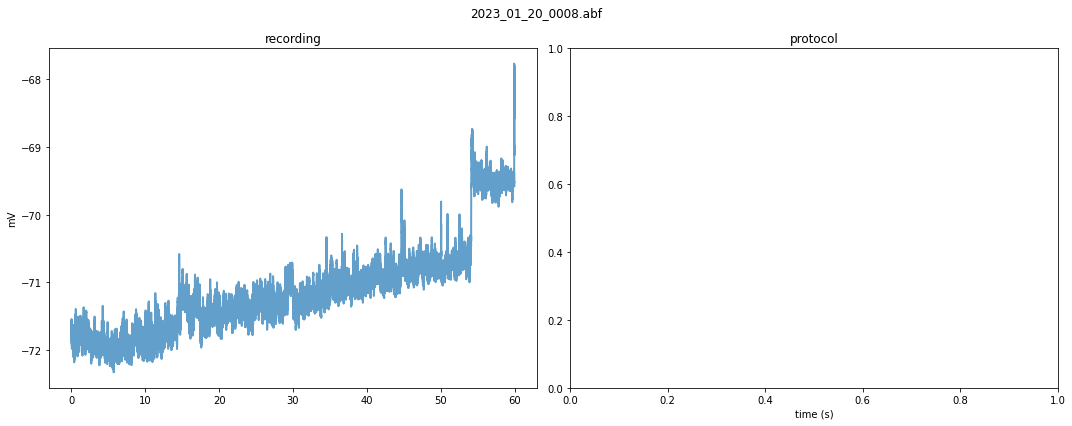

 non optical protocol : /Users/anzalks/Documents/Expt_data/Recordings/2023_01_20/2023_01_20_0008.abf
3
3


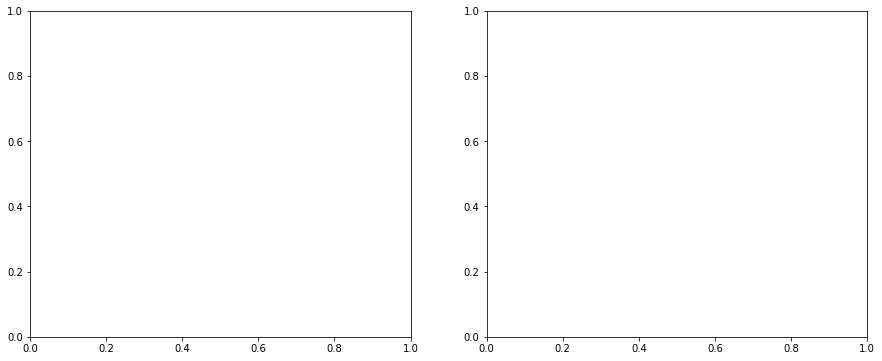

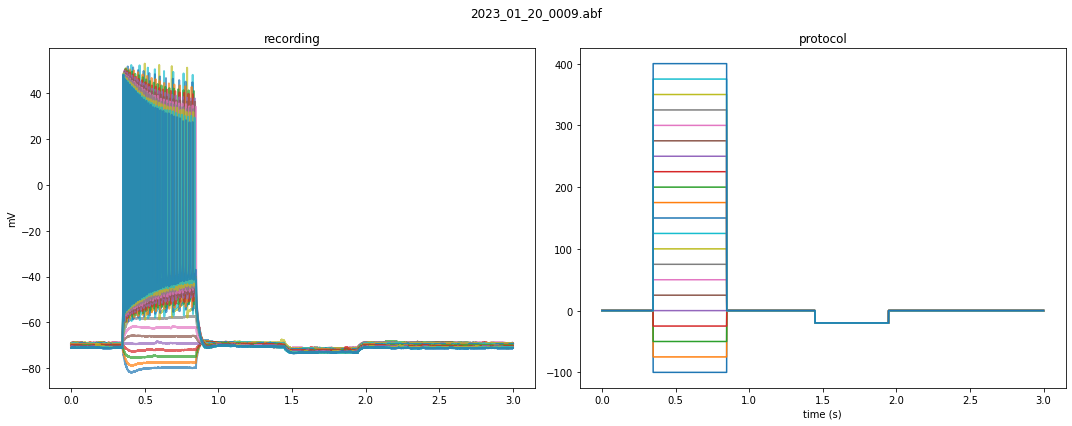

 non optical protocol : /Users/anzalks/Documents/Expt_data/Recordings/2023_01_20/2023_01_20_0009.abf
14
14


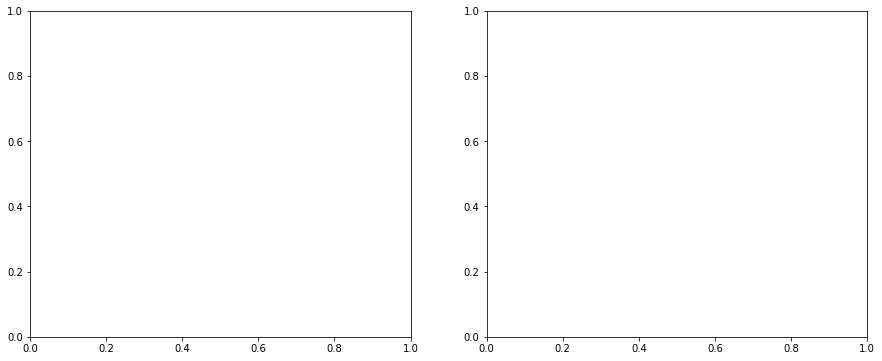

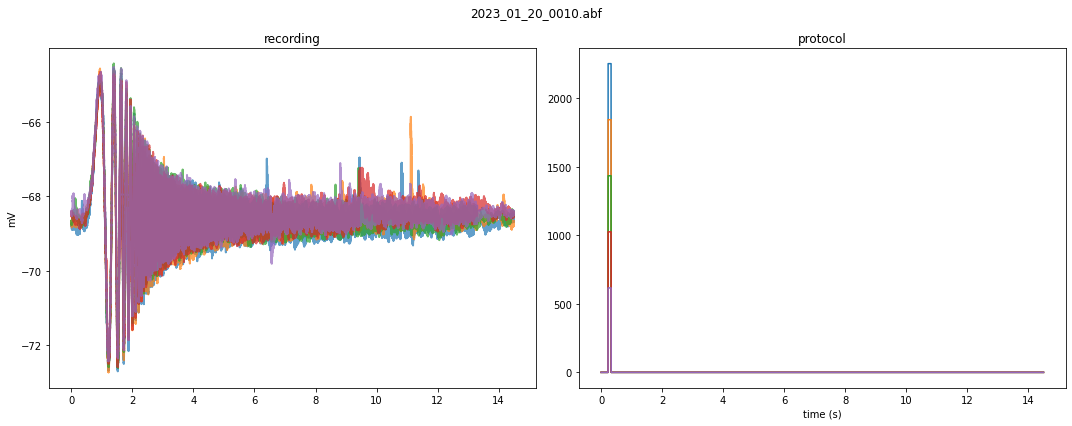

 non optical protocol : /Users/anzalks/Documents/Expt_data/Recordings/2023_01_20/2023_01_20_0010.abf
3
3


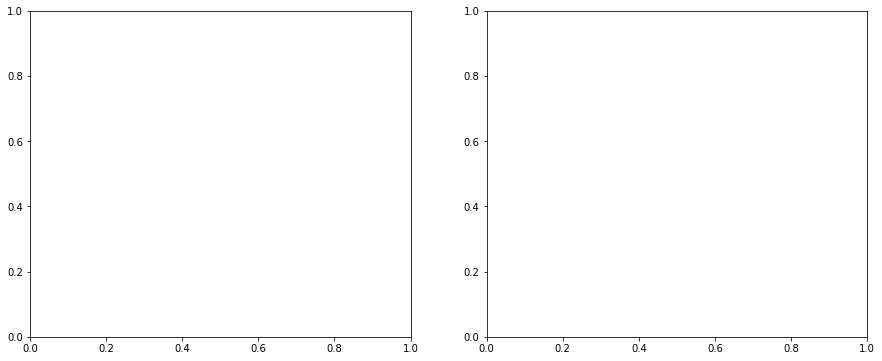

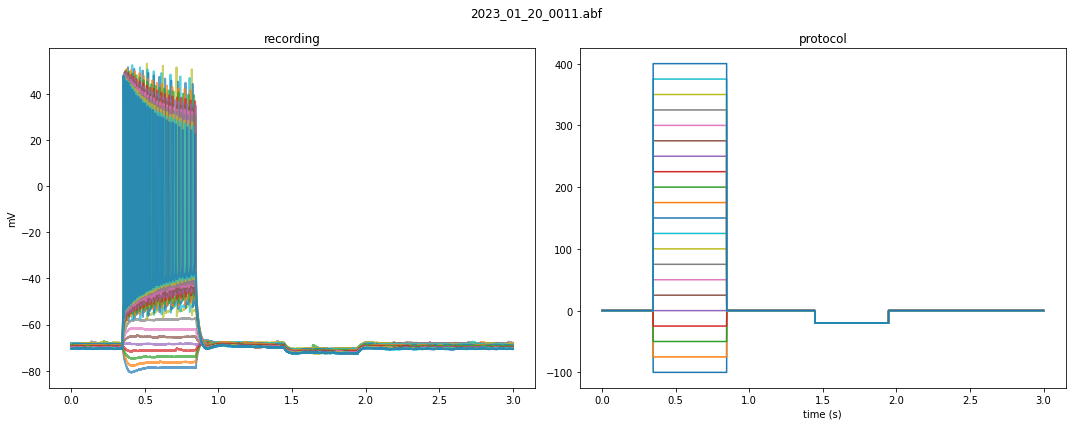

 non optical protocol : /Users/anzalks/Documents/Expt_data/Recordings/2023_01_20/2023_01_20_0011.abf
60
60


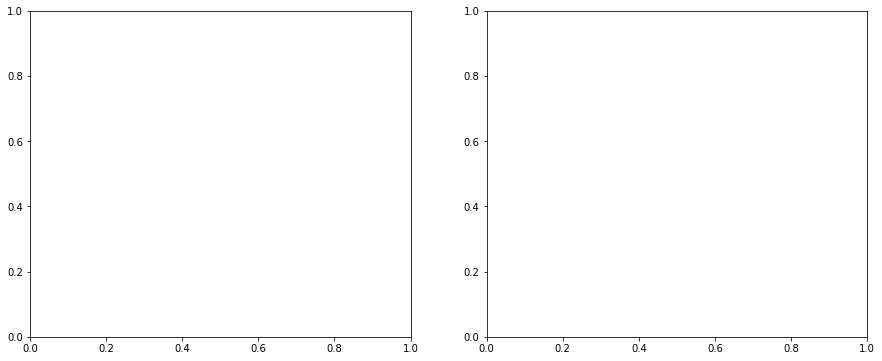

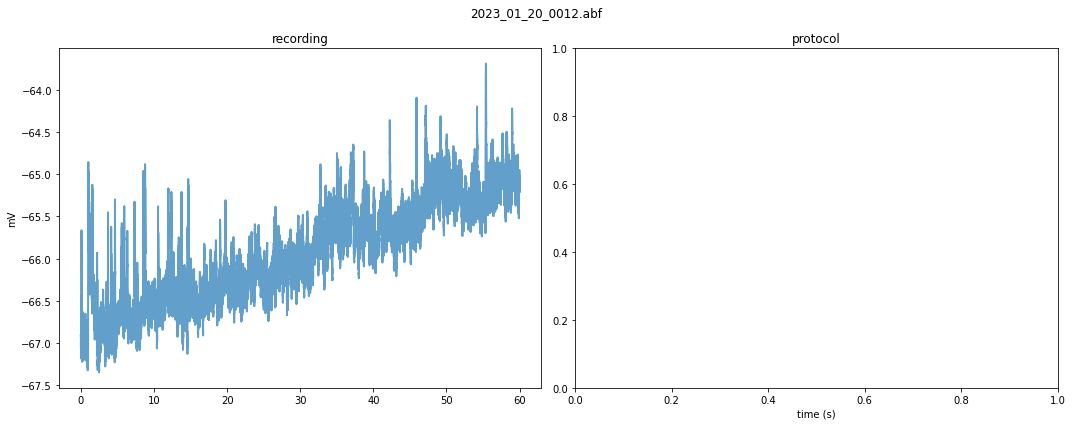

 non optical protocol : /Users/anzalks/Documents/Expt_data/Recordings/2023_01_20/2023_01_20_0012.abf
3
3


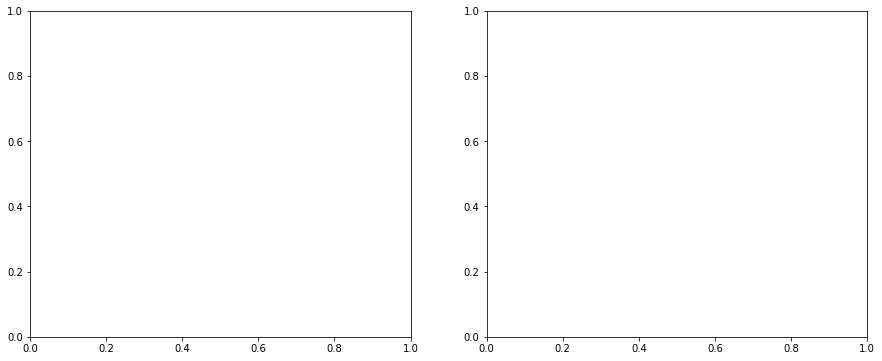

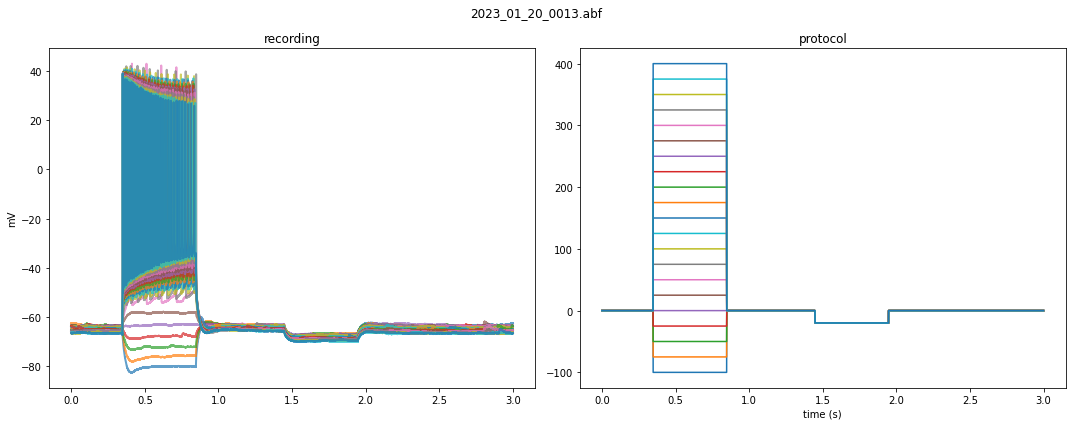

 non optical protocol : /Users/anzalks/Documents/Expt_data/Recordings/2023_01_20/2023_01_20_0013.abf
14
14


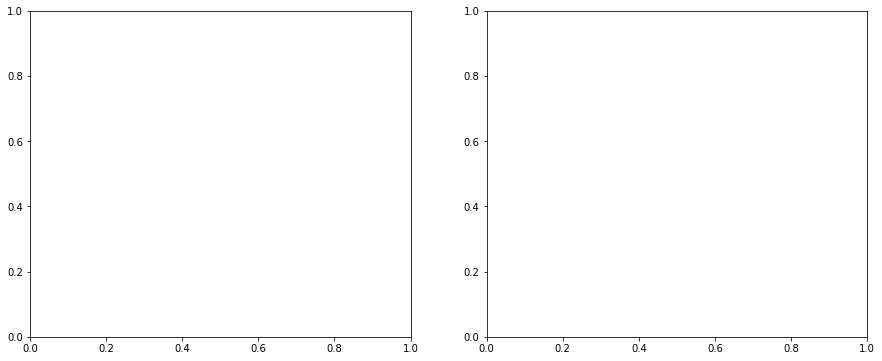

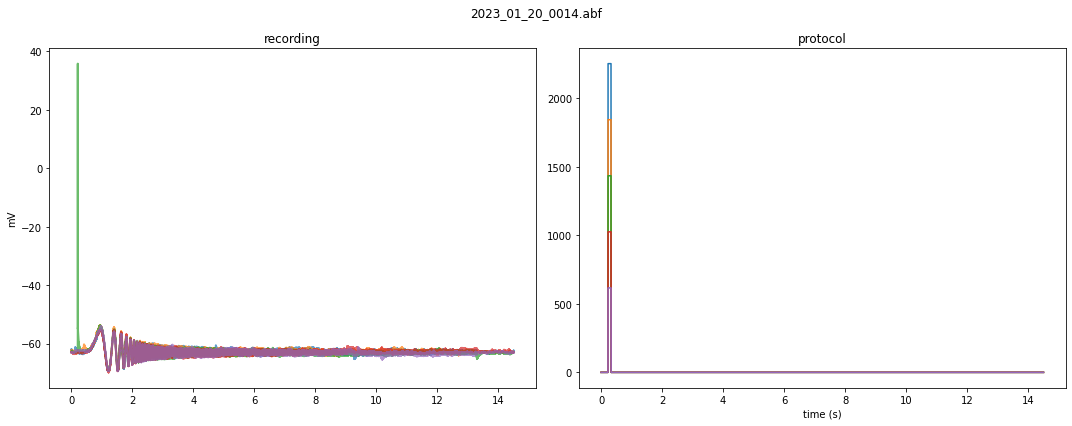

 non optical protocol : /Users/anzalks/Documents/Expt_data/Recordings/2023_01_20/2023_01_20_0014.abf
14
14


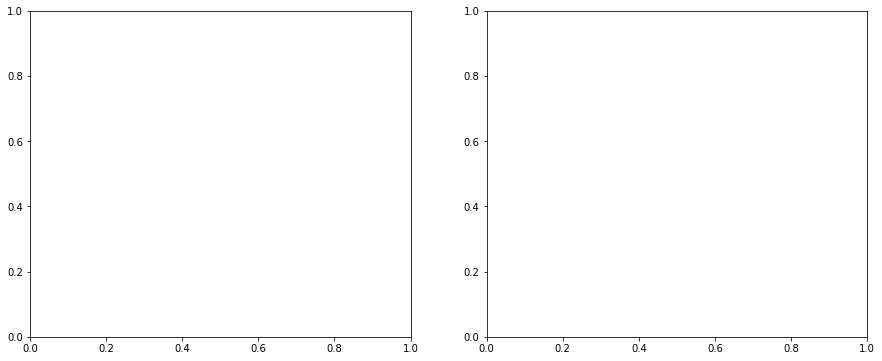

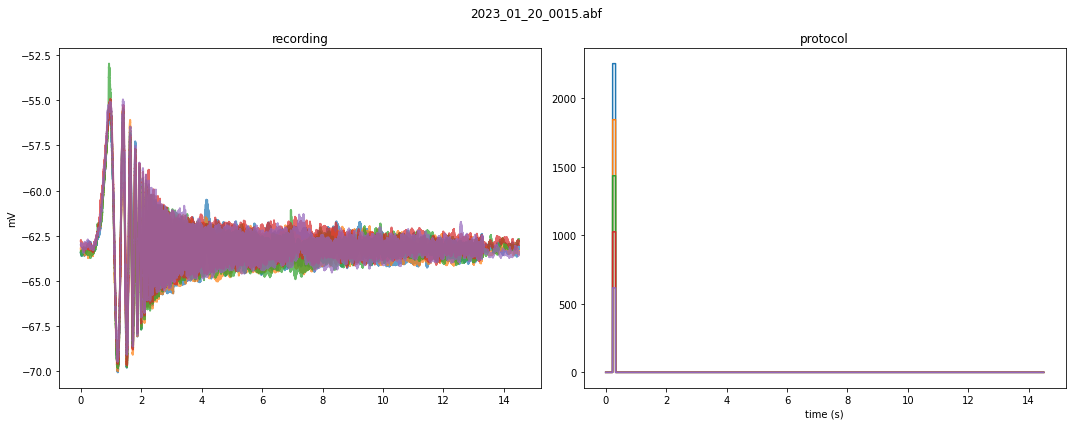

 non optical protocol : /Users/anzalks/Documents/Expt_data/Recordings/2023_01_20/2023_01_20_0015.abf
3
3


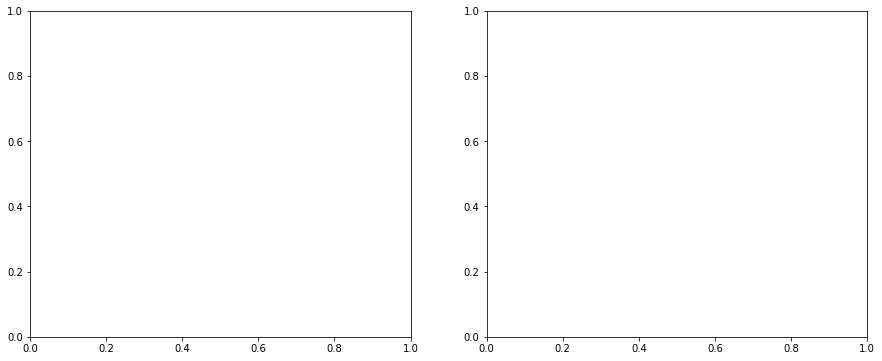

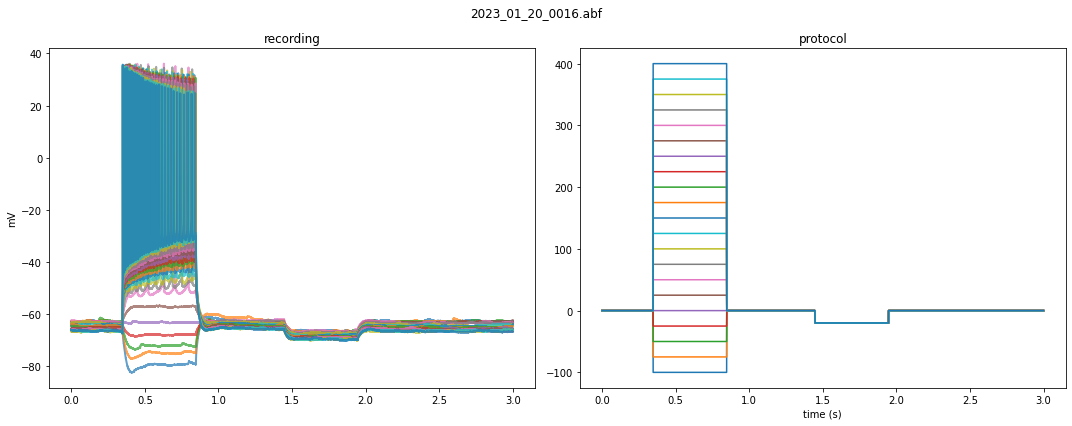

 non optical protocol : /Users/anzalks/Documents/Expt_data/Recordings/2023_01_20/2023_01_20_0016.abf


In [28]:
for i in abfs:
    try:
        plot_optical(i,outdir)
    except:
        plot_non_optical(i,outdir)
        print(f' non optical protocol : {i}')
        continue